In [32]:
# All the possible imports:
from confidenceinterval import roc_auc_score
from confidenceinterval import precision_score, recall_score, f1_score
from confidenceinterval import accuracy_score, ppv_score, npv_score, tpr_score, fpr_score, tnr_score
from confidenceinterval.bootstrap import bootstrap_ci
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [33]:
df = pd.read_csv('/home/zokirov_diyorbek/Downloads/breast-cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [34]:
df.drop('id', axis=1, inplace=True)

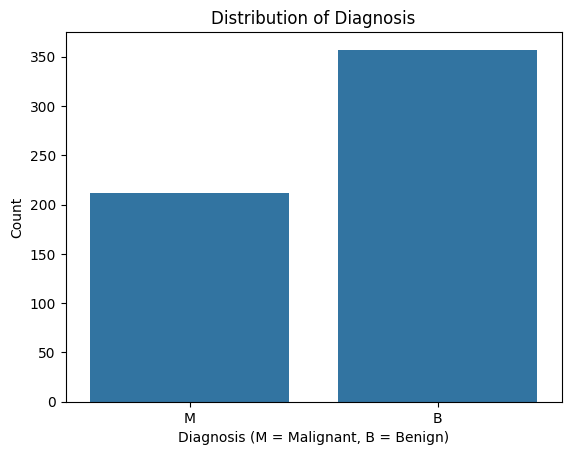

In [35]:
sns.countplot(x='diagnosis', data=df)
plt.title('Distribution of Diagnosis')
plt.xlabel('Diagnosis (M = Malignant, B = Benign)')
plt.ylabel('Count')
plt.show()

In [36]:
df.describe().T.style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.000000,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.110000
texture_mean,569.000000,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.280000
perimeter_mean,569.000000,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.500000
area_mean,569.000000,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.000000
smoothness_mean,569.000000,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.163400
compactness_mean,569.000000,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.345400
concavity_mean,569.000000,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.426800
concave points_mean,569.000000,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.201200
symmetry_mean,569.000000,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.304000
fractal_dimension_mean,569.000000,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.097440


In [37]:
df['diagnosis'] = (df['diagnosis'] == 'M').astype(int)

In [38]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [39]:
# Let's see what columns are available in the dataset
print("Available columns:", df.columns.tolist())
print("\nDataset shape:", df.shape)

# For now, let's use all numeric columns except 'diagnosis' as features
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
if 'diagnosis' in numeric_columns:
    numeric_columns.remove('diagnosis')

print(f"\nUsing {len(numeric_columns)} numeric features")

X = df[numeric_columns]
y = df['diagnosis']

print(f"\nFeatures (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")

Available columns: ['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']

Dataset shape: (569, 31)

Using 30 numeric features

Features (X) shape: (569, 30)
Target (y) shape: (569,)


In [40]:
# Import necessary libraries for machine learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score as sklearn_roc_auc_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Generate predictions (probabilities for the positive class)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]  # Probabilities for class 1 (malignant)
y_pred_binary = rf_model.predict(X_test)  # Binary predictions

# Prepare variables for confidence interval testing
y_true = y_test  # True labels
y_pred = y_pred_proba  # Predicted probabilities (for ROC-AUC)

print(f"Test set size: {len(y_test)}")
print(f"y_true shape: {y_true.shape}")
print(f"y_pred shape: {y_pred.shape}")
print(f"y_true (first 10): {y_true.values[:10]}")
print(f"y_pred (first 10): {y_pred[:10]}")

# Calculate baseline AUC using sklearn for comparison
baseline_auc = sklearn_roc_auc_score(y_true, y_pred)
print(f"\nBaseline AUC (sklearn): {baseline_auc:.4f}")

# Now test the confidence interval package
print("\n" + "="*50)
print("Testing confidence interval package:")

# Bootstrap CI:
auc, ci = roc_auc_score(y_true,
                        y_pred,
                        confidence_level=0.95,
                        method='bootstrap_bca',
                        n_resamples=5000)

print(f"AUC: {auc:.4f}")
print(f"95% Confidence Interval: [{ci[0]:.4f}, {ci[1]:.4f}]")

Test set size: 171
y_true shape: (171,)
y_pred shape: (171,)
y_true (first 10): [0 0 0 0 0 0 1 0 1 0]
y_pred (first 10): [0.05 0.   0.   0.   0.   0.04 0.92 0.14 0.99 0.01]

Baseline AUC (sklearn): 0.9968

Testing confidence interval package:
AUC: 0.9968
95% Confidence Interval: [0.9879, 0.9993]


In [41]:
# Bootstrap CI:
auc, ci = roc_auc_score(y_true,
                        y_pred,
                        confidence_level=0.95,
                        method='bootstrap_bca',
                        n_resamples=5000)

print(f"AUC: {auc:.4f}")
print(f"95% Confidence Interval: [{ci[0]:.4f}, {ci[1]:.4f}]")
print(f"Confidence Interval Width: {ci[1] - ci[0]:.4f}")

AUC: 0.9968
95% Confidence Interval: [0.9882, 0.9993]
Confidence Interval Width: 0.0112


In [42]:
# Test different confidence interval metrics
from confidenceinterval import precision_score, recall_score, f1_score

print("Testing binary classification metrics with confidence intervals:")
print("="*60)

# For binary classification metrics, we need binary predictions, not probabilities
# Use y_pred_binary (0/1 predictions) instead of y_pred (probabilities)

# F1 Score with confidence intervals
print("\n1. F1 Score Tests:")
binary_f1, ci = f1_score(y_true, y_pred_binary, confidence_level=0.95, average='binary')
print(f"Binary F1: {binary_f1:.4f}, CI: [{ci[0]:.4f}, {ci[1]:.4f}]")

macro_f1, ci = f1_score(y_true, y_pred_binary, confidence_level=0.95, average='macro')
print(f"Macro F1: {macro_f1:.4f}, CI: [{ci[0]:.4f}, {ci[1]:.4f}]")

micro_f1, ci = f1_score(y_true, y_pred_binary, confidence_level=0.95, average='micro')
print(f"Micro F1: {micro_f1:.4f}, CI: [{ci[0]:.4f}, {ci[1]:.4f}]")

# Bootstrap method
bootstrap_binary_f1, ci = f1_score(y_true, y_pred_binary, confidence_level=0.95, 
                                   average='binary', method='bootstrap_bca', n_resamples=5000)
print(f"Bootstrap Binary F1: {bootstrap_binary_f1:.4f}, CI: [{ci[0]:.4f}, {ci[1]:.4f}]")

# Precision Score - need to specify a valid method for binary precision
print("\n2. Precision Score Tests:")
precision, ci = precision_score(y_true, y_pred_binary, confidence_level=0.95, 
                               average='binary', method='wilson')
print(f"Binary Precision (Wilson): {precision:.4f}, CI: [{ci[0]:.4f}, {ci[1]:.4f}]")

# Try bootstrap method for precision
precision_bootstrap, ci = precision_score(y_true, y_pred_binary, confidence_level=0.95, 
                                        average='binary', method='bootstrap_bca', n_resamples=5000)
print(f"Binary Precision (Bootstrap): {precision_bootstrap:.4f}, CI: [{ci[0]:.4f}, {ci[1]:.4f}]")

# Recall Score - need to specify a valid method for binary recall
print("\n3. Recall Score Tests:")
recall, ci = recall_score(y_true, y_pred_binary, confidence_level=0.95, 
                         average='binary', method='wilson')
print(f"Binary Recall (Wilson): {recall:.4f}, CI: [{ci[0]:.4f}, {ci[1]:.4f}]")

# Try bootstrap method for recall
recall_bootstrap, ci = recall_score(y_true, y_pred_binary, confidence_level=0.95, 
                                   average='binary', method='bootstrap_bca', n_resamples=5000)
print(f"Binary Recall (Bootstrap): {recall_bootstrap:.4f}, CI: [{ci[0]:.4f}, {ci[1]:.4f}]")

print("\n" + "="*60)
print("Available methods for binary metrics:")
print("- Proportion methods: 'wilson', 'normal', 'agresti_coull', 'beta', 'jeffreys', 'binom_test'")
print("- Bootstrap methods: 'bootstrap_bca', 'bootstrap_percentile'")
print("- Takahashi method: Available for F1 but not for individual precision/recall")
print("\nNote: For ROC-AUC, we use y_pred (probabilities)")
print("For other metrics (F1, Precision, Recall), we use y_pred_binary (0/1 predictions)")

Testing binary classification metrics with confidence intervals:

1. F1 Score Tests:
Binary F1: 0.9508, CI: [0.9023, 0.9993]
Macro F1: 0.9618, CI: [0.8529, 1.0706]
Micro F1: 0.9649, CI: [0.9373, 0.9925]
Bootstrap Binary F1: 0.9508, CI: [0.8955, 0.9821]

2. Precision Score Tests:
Binary Precision (Wilson): 1.0000, CI: [0.9379, 1.0000]
Binary Precision (Bootstrap): 1.0000, CI: [1.0000, 1.0000]

3. Recall Score Tests:
Binary Recall (Wilson): 0.9062, CI: [0.8102, 0.9563]
Binary Recall (Bootstrap): 0.9062, CI: [0.8143, 0.9630]

Available methods for binary metrics:
- Proportion methods: 'wilson', 'normal', 'agresti_coull', 'beta', 'jeffreys', 'binom_test'
- Bootstrap methods: 'bootstrap_bca', 'bootstrap_percentile'
- Takahashi method: Available for F1 but not for individual precision/recall

Note: For ROC-AUC, we use y_pred (probabilities)
For other metrics (F1, Precision, Recall), we use y_pred_binary (0/1 predictions)


In [43]:
# Wilson is used by default:
ppv, ci = ppv_score(y_true, y_pred_binary, confidence_level=0.95, method='wilson')
print(f"PPV (Wilson): {ppv:.4f}, CI: [{ci[0]:.4f}, {ci[1]:.4f}]")

ppv, ci = ppv_score(y_true, y_pred_binary, confidence_level=0.95, method='jeffreys')
print(f"PPV (Jeffreys): {ppv:.4f}, CI: [{ci[0]:.4f}, {ci[1]:.4f}]")

ppv, ci = ppv_score(y_true, y_pred_binary, confidence_level=0.95, method='agresti_coull')
print(f"PPV (Agresti-Coull): {ppv:.4f}, CI: [{ci[0]:.4f}, {ci[1]:.4f}]")

ppv, ci = ppv_score(y_true, y_pred_binary, confidence_level=0.95, method='bootstrap_bca')
print(f"PPV (Bootstrap BCA): {ppv:.4f}, CI: [{ci[0]:.4f}, {ci[1]:.4f}]")


PPV (Wilson): 1.0000, CI: [0.9379, 1.0000]
PPV (Jeffreys): 1.0000, CI: [0.9578, 1.0000]
PPV (Agresti-Coull): 1.0000, CI: [0.9257, 1.0000]
PPV (Bootstrap BCA): 1.0000, CI: [1.0000, 1.0000]


In [44]:
from confidenceinterval import classification_report_with_ci

y_true = [0, 1, 2, 2, 2, 1, 1, 1, 0, 2, 2, 1, 0, 2, 2, 1, 2, 2, 1, 1]
y_pred = [0, 1, 0, 0, 2, 1, 1, 1, 0, 2, 2, 1, 0, 1, 2, 1, 2, 2, 1, 1]

classification_report_with_ci(y_true, y_pred)

,Class,Precision,Recall,F1-Score,Precision CI,Recall CI,F1-Score CI,Support
0,Class 0,0.600,1.000,0.750,"(0.231, 0.882)","(0.439, 1.0)","(0.408, 1.092)",3
1,Class 1,0.889,1.000,0.941,"(0.565, 0.98)","(0.676, 1.0)","(0.796, 1.086)",8
2,Class 2,1.000,0.667,0.800,"(0.61, 1.0)","(0.354, 0.879)","(0.562, 1.038)",9
3,micro,0.850,0.850,0.850,"(0.694, 1.006)","(0.694, 1.006)","(0.694, 1.006)",20
4,macro,0.830,0.889,0.830,"(0.702, 0.958)","(0.775, 1.002)","(0.548, 1.113)",20
